# Curso de Optimización  (DEMAT)
# Tarea 1

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Enero  30, 2025**    |
| Fecha límite de entrega de la tarea: | **Febrero 9, 2025**    |

## Indicaciones

Escriba el código de los algoritmos que se piden en una
celda de este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook 
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo aplica para los valores que devuelve una función. 
Pueden codificar la salida de las funciones de la manera que prefieran.
El punto es que podamos tener acceso a los resultados para poder usarlos, 
y por eso no es conveniente que la función sólo imprima los valores 
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar la(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir 
el archivo Classroom sin comprimir para poder escribir anotaciones en el PDF.

----

## Ejercicio 1 (3.5 puntos)

1. Programar el método de la sección dorada descrito en la diapositiva 16 de la Clase 3.
   La función que implementa el método recibe como argumentos la función que se va
   a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia
   $\tau>0$, y el número máximo de iteraciones $N$.
   
   La función debe devolver el punto $x_k, f(x_k)$, los extremos del último intervalo de búsqueda
   $[x_l, x_u]$, el número de iteraciones $k$ realizadas y la variable booleana $bres$
   que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.
   
2. Probar el método con las funciones que se describen en las siguientes
   celdas. 
- Use el intervalo que se especifica en cada caso y $N=50$.
- Use como tolerancia $\tau = \epsilon_m^{1/3}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Imprima $k, x_k, f_k, x_u-x_l$ y $bres$. 

### Solución:

In [14]:
# Código de la función

import numpy as np

def met_seccion_dorada(fun, xl, xu, tol, N):
    rho = (np.sqrt(5) - 1)/2 

    for k in range(1, N+1): 
        if xu - xl < tol: 
            if fun(xl) < fun(xu): 
                xk = xl 
            else: 
                xk = xu 

            return  xk, fun(xk), xl, xu, k, True 
        
        b = rho * (xu - xl) 
        x1 = xu - b 
        x3 = xl + b 

        if fun(x1) < fun(x3):
            xu = x3 
            xk = x1 
        else: 
            xl = x1 
            xk = x3 
        
    return xk, fun(xk), xl, xu, k, False 



In [15]:
import numpy as np 

eps = np.finfo(np.float32).eps 

#Definicion de limites y tolerancia 

N = 50 # Limite de iteraciones 
tol = eps**(1/3) # Tolerancia
tol2 = 1e-4 
tol4 = 1

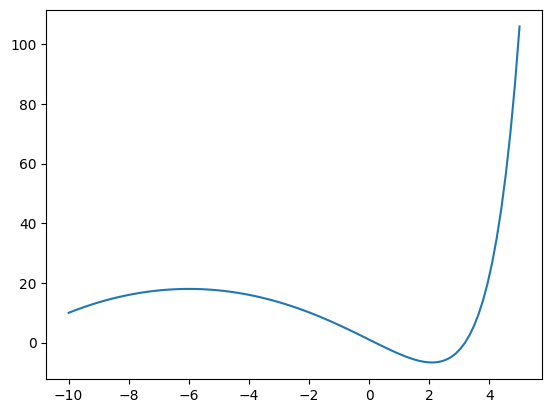

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo 1
def fnc1(x): 
    return np.exp(x) - 6*x - 0.5*x**2

xl = -10
xu =   5
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc1(xx))
plt.show()

In [17]:
# Prueba del algoritmo


xk, fk,  xl, xu, k, flag = met_seccion_dorada(fnc1, xl, xu, tol, N)

print(f"Parametros tol: {tol}, N: {N}")
print(f"k: {k}, \nxk: {xk}, \nfk: {fk}, \nxu - xl: {xu - xl}, \nbres: {flag}")


Parametros tol: 0.00492156660115185, N: 50
k: 18, 
xk: 2.0891664176072227, 
fk: -6.6391281363350885, 
xu - xl: 0.004200503731088379, 
bres: True


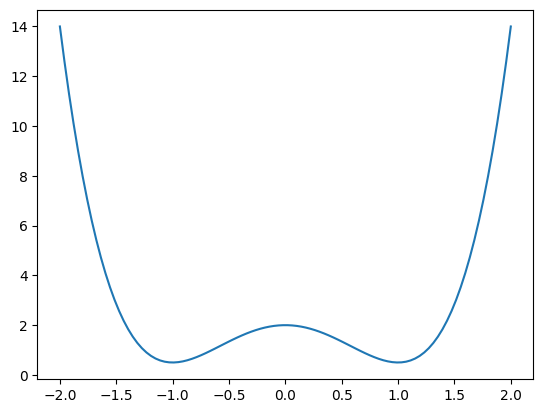

In [18]:
# Función objetivo 2
def fnc2(x): 
    return 1.5*x**4 - 3*x**2 + 2

xl = -2
xu =  2
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc2(xx))
plt.show()

In [19]:
# Prueba del algoritmo

xk, fk,  xl, xu, k, flag = met_seccion_dorada(fnc2, xl, xu, tol, N)

print(f"Parametros tol: {tol}, N: {N}")
print(f"k: {k}, \nxk: {xk}, \nfk: {fk}, \nxu - xl: {xu - xl}, \nbres: {flag}")


Parametros tol: 0.00492156660115185, N: 50
k: 15, 
xk: 0.9983606548565729, 
fk: 0.5000160982918558, 
xu - xl: 0.004744965158568926, 
bres: True


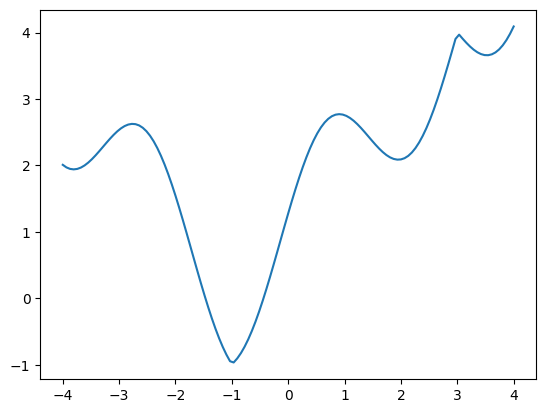

In [20]:
# Función objetivo 3
def fnc3(x, fparam=None): 
    return np.abs(x+1) - np.sin(2*np.abs(x-3)) 

xl = -4
xu =  4
xx = np.linspace(xl, xu, 125)
plt.plot(xx, fnc3(xx))
plt.show()

In [21]:
# Prueba del algoritmo
xk, fk,  xl, xu, k, flag = met_seccion_dorada(fnc3, xl, xu, tol, N)

print(f"Parametros tol: {tol}, N: {N}")
print(f"k: {k}, \nxk: {xk}, \nfk: {fk}, \nxu - xl: {xu - xl}, \nbres: {flag}")



Parametros tol: 0.00492156660115185, N: 50
k: 17, 
xk: -1.0012114919019854, 
fk: -0.9877913066551918, 
xu - xl: 0.003624830830278536, 
bres: True


_

```







```

---

## Ejercicio 2 (3 puntos)

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

Dado el punto $\mathbf{x}_k$ y la dirección $\mathbf{d}_k$, definimos la función 
$g(t; \mathbf{x}_k, \mathbf{d}_k) = f(\mathbf{x}_k + t\mathbf{d}_k)$.

1. Programe las funciones  $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$.
2. Calcule de manera analítica el gradiente de $f(\mathbf{x})$ y programe la función correspondiente.
3. Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde 
   $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$.
   Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección
   $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.
4. Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y 
   $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,3]$.
5. Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$
   en el intervalo $[0, 3]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$,
   imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbf{x}_1$, $f(\mathbf{x}_1)$.
6. Repita los puntos 4 y 5 usando el intervalo $[0,10]$.

### Solución.

In [22]:
import numpy as np 

def fun_f (x): 
    x1 = x[0]
    x2 = x[1]

    return (x1**2 + x2**2)/4000 - np.cos(x1) * np.cos(x2 / np.sqrt(2)) + 1 

def fun_g (t, x, d): 
    d = np.asarray(d) 
    return fun_f(x + t * d) 

2. Veamos que 

$$
\nabla f (\bold{x}) = (\partial_{x_1} f (x_1, x_2), \partial_{x_2} f(x_1, x_2)). 
$$

Por un lado tenemos que 

$$
\begin{align*}
\partial _{x_1} f(x_1, x_2) 
&= \partial_{x_1} \left (\frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 \right) \\
&= \frac{x_1}{2000} + \sin(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right). 
\end{align*} \\ 
$$

Por otro lado


$$
\begin{align*}
\partial_{x_2} f(x_1, x_2) 
&= \partial_{x_2} \left (\frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 \right ) \\ 
&= \frac{x_2}{2000} + \frac{\cos(x_1)\sin\left(\frac{x_2}{\sqrt{2}}\right)}{\sqrt{2}}
\end{align*}
$$

Por lo tanto tenemos que 

$$
\nabla f (\bold{x}) = \left (  \frac{x_1}{2000} + \sin(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right),  \frac{x_2}{2000} + \frac{\cos(x_1)\sin\left(\frac{x_2}{\sqrt{2}}\right)}{\sqrt{2}}\right ). 
$$

En la siguiente celda está implementada la función que hace el calculo del gradiente para un punto $(x_1, x_2)$. 

3. Recordemos que dado un vector de direcci\'on $d$ y un vector $x$, la derivada direccional se obtiene de la siguiente expresión 
$$ D_df(\bold x) = \nabla f(\bold x) \cdot d. $$

Para obtener la derivada direccional de interés, calculemos primero el valor de $d_0$

$$
d_0 = \frac{p}{\|p\|} = \frac{(2, 1)}{\sqrt{2^2 + 1^1}} = \frac{(2, 1)}{\sqrt{5}} = \left (\frac 2 {\sqrt{5}}, \frac 1 {\sqrt{5}} \right). 
$$

Luego, 

$$
\begin{align*}
    D_{d_0} f(x_0) 
    &= \nabla f (3, 0.5) \cdot \left (\frac 2 {\sqrt{5}}, \frac 1 {\sqrt{5}} \right) \\ 
    &= \left (  \frac{3}{2000} + \sin(3)\cos\left(\frac{0.5}{\sqrt{2}}\right),  \frac{0.5}{2000} + \frac{\cos(3)\sin\left(\frac{0.5}{\sqrt{2}}\right)}{\sqrt{2}}\right )\cdot \left (\frac 2 {\sqrt{5}}, \frac 1 {\sqrt{5}} \right).
\end{align*}
$$

Por otro lado, 

$$
    D_{g_0} f(x_0)  = \nabla f(3, 0.5) \cdot \frac{ \nabla f(\mathbf{x}_0)}{\|\nabla f(\mathbf{x}_0)\|}. 
$$

En la siguiente celda obtendremos los valores numericamente. 

In [25]:
import numpy as np 

#Funcion del gradiente del punto 2. 
def der_par (x1, x2): 
    p1 = x1/2000 + np.sin(x1) * np.cos(x2 / np.sqrt(2)) 
    p2 = x2/2000 + (np.cos(x1) * np.sin(x2 / np.sqrt(2)))/np.sqrt(2) 

    return p1, p2


#Calculos correspondientes al punto 3.

val_f0 = np.array(der_par(3, 0.5)) #Valo del gradiente valuada en x0

norm = np.linalg.norm (val_f0, ord=2) # Norma del gradiente en el punto x0

d0 = (1/np.sqrt(5)) * np.array([2, 1]) 
g0 = (1/norm) * np.array([val_f0[0],  val_f0[1]])

print(f"Valor de la derivada en direccion de p: {val_f0 @ d0 }")
print(f"Valor de la derivada en direccion de g_0: {val_f0 @ g0 }")


Valor de la derivada en direccion de p: 0.011475034596120023
Valor de la derivada en direccion de g_0: 0.27667848944420204


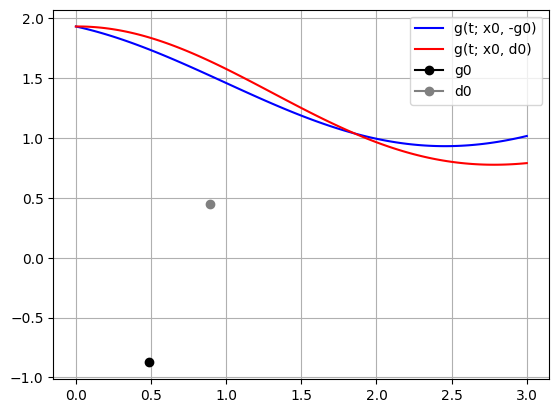

Resultados para -g0
x0:  [3, 0.5] 
f(x0):  1.9310723123875322 
t0:  2.456103380167501 
x1:  [1.81143139 2.64936002] 
f(x1) 0.9315587863990931

Resultados para d0
x0:  [3, 0.5] 
f(x0):  1.9310723123875322 
t0:  2.781284459713032 
x1:  [1.6540683  2.93392915] 
f(x1) 0.962681941367265


In [32]:
#Codigo del punto 4 
import matplotlib.pyplot as plt 

x0 = [3, 0.5]

inter = np.linspace(0, 3, 125) 
imagen = [fun_g(t, x0, -g0 ) for t in inter]
imagen2 = [fun_g(t, x0, d0) for t in inter]
plt.plot(inter ,  imagen, color ='blue', label='g(t; x0, -g0)')
plt.plot(inter, imagen2, color='red', label = "g(t; x0, d0)")
plt.plot(g0[0], g0[1], marker = 'o', color = 'black', label = 'g0')
plt.plot(d0[0], d0[1], marker = 'o', color = 'gray', label = 'd0')
plt.legend()
plt.legend()
plt.grid(True)
plt.show()



xl = 0 
xu = 3 
tol = 1e-5
N = 1000

t0, fk, xl, xu, k, con = met_seccion_dorada(lambda t: fun_g(t, x0, -g0), xl, xu, tol, N)

x1 = x0 - t0 * g0

print("Resultados para -g0")
print("x0: ", x0,  "\nf(x0): ", fun_f(x0), "\nt0: " , t0, "\nx1: ", x1 , "\nf(x1)",  fun_f(x1))


print("\nResultados para d0")

xl = 0 
xu = 3 
tol = 1e-5
N = 1000
t0, fk,  xl, xu, k, con = met_seccion_dorada(lambda t: fun_g(t, x0, d0), xl, xu, tol, N)
x1 = x0 - t0 * g0

print("x0: ", x0,  "\nf(x0): ", fun_f(x0), "\nt0: " , t0, "\nx1: ", x1 , "\nf(x1)",  fun_f(x1))




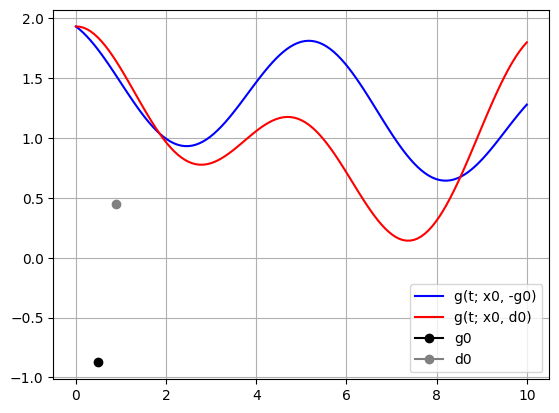

Resultados para -g0
x0:  [3, 0.5] 
f(x0):  1.9310723123875322 
t0:  2.456103537005115 
x1:  [1.81143132 2.64936015] 
f(x1) 0.931558786398813

Resultados para d0
x0:  [3, 0.5] 
f(x0):  1.9310723123875322 
t0:  7.368885197494004 
x1:  [-0.56598411  6.94858328] 
f(x1) 0.8436334028837287


In [34]:
#Codigo del punto 4 
import matplotlib.pyplot as plt 

x0 = [3, 0.5]

inter = np.linspace(0, 10, 125) 
imagen = [fun_g(t, x0, -g0 ) for t in inter] # grafica de g(t, x0, -g0)
imagen2 = [fun_g(t, x0, d0) for t in inter] # grafica de g(t, x0, d0)
plt.plot(inter ,  imagen, color ='blue', label='g(t; x0, -g0)')
plt.plot(inter, imagen2, color='red', label = "g(t; x0, d0)")
plt.plot(g0[0], g0[1], marker = 'o', color = 'black', label = 'g0')
plt.plot(d0[0], d0[1], marker = 'o', color = 'gray', label = 'd0')
plt.legend()
plt.grid(True)
plt.show()


xl = 0
xu =  10
tol = 1e-5
N = 1000

t0, fk,  xl, xu, k, con = met_seccion_dorada(lambda t: fun_g(t, x0, -g0), xl, xu, tol, N)

x1 = x0 - t0 * g0
print("Resultados para -g0")
print("x0: ", x0,  "\nf(x0): ", fun_f(x0), "\nt0: " , t0, "\nx1: ", x1 , "\nf(x1)",  fun_f(x1))


print("\nResultados para d0")

xl = 0
xu = 10
tol = 1e-5
N = 1000
t0, fk, xl, xu, k, con = met_seccion_dorada(lambda t: fun_g(t, x0, d0), xl, xu, tol, N)
x1 = x0 - t0 * g0

print("x0: ", x0,  "\nf(x0): ", fun_f(x0), "\nt0: " , t0, "\nx1: ", x1 , "\nf(x1)",  fun_f(x1))





Observemos que el minimizador de la función $g(t, x0, -g0)$ para el intervalo [0, 10] es el mismo que al aplicar el algoritmo para el intervalo [0,3], sin embargo, en la gráfica es sencillo ver que el valor en el punto $t0$, no es el mínimo de la función, para poder obener el valor real del mínimo de la función, podemos aplicar el algoritmo en el intervalo [1, 10]. 

In [35]:
t0, fk,  xl, xu, k, con = met_seccion_dorada(lambda t: fun_g(t, x0, -g0), 1, 10, tol, N)

x1 = x0 - t0 * g0
print("Resultados para -g0")
print("x0: ", x0,  "\nf(x0): ", fun_f(x0), "\nt0: " , t0, "\nx1: ", x1 , "\nf(x1)",  fun_f(x1))


Resultados para -g0
x0:  [3, 0.5] 
f(x0):  1.9310723123875322 
t0:  8.199511365362689 
x1:  [-0.96794447  7.67547234] 
f(x1) 0.6432358297783074


Notemos que gracias a este cambio retorna un resultado acorde a lo que observamos en la gráfica. 

--

```







```

---

## Ejercicio 3 (1.5 puntos)

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la
función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.

### Solución:

Sea $\mathbf{a}, \mathbf{b} $ y $f$ como en el enunciado. Definamos $f(\mathbf x) = g(\mathbf x)h(\mathbf x)$, dónde $g(\mathbf x) = \mathbf a^\top \mathbf x$ y $h(\mathbf x) = \mathbf b^\top \mathbf x$, sabemos que

$$\nabla f(\mathbf x) = h(\mathbf x) \nabla g( \mathbf x)  + g( \mathbf x) \nabla h(\mathbf x),$$

de lo que podemos concluir que 

$$
\nabla f(\mathbf x) = (\mathbf  b^\top  \mathbf x) \mathbf  a + ( \mathbf  a ^\top x)  \mathbf  b.  
$$



Luego, tengamos en cuenta que la matriz Hessiana se compone de las segundas derivadas, por lo tanto, sin perdida de generalidad, tenemos dos posibles casos, donde es la doble derivada de la variable $x_k$ o la derivada $\partial _{km} f(\bold{x})$ para algún $m \in \{ 1, 2, \ldots, n\}$. Comencemos calculando la entrada $km$ de la matriz

$$
\begin{align*}
\partial_{km} f(\bold{x}) 
&= \partial_{m} \left [  \left ( a_k \right) \left ( \sum_{j = 1} ^n b_j x_j \right)    + \left ( \sum_{i = 1} ^n a_i x_i \right) \left ( b_k \right) \right ] \\ 
&= \partial_{m}  \left ( a_k \right) \left ( \sum_{j = 1} ^n b_j x_j \right)    +  \partial_{m} \left ( \sum_{i = 1} ^n a_i x_i \right) \left ( b_k\right)  \\ 
&= a_k  b_m + a_m  b_k. 
\end{align*}
$$

Por otro lado, obtengamos la entrada $kk$

$$
\begin{align*}
\partial_{k^2} f(\bold{x}) 
&= \partial_{k} \left [  \left ( a_k  \right) \left ( \sum_{j = 1} ^n b_j x_j \right)    + \left ( \sum_{i = 1} ^n a_i x_i \right) \left ( b_k\right) \right ] \\ 
&= \partial_{k}  \left ( a_k \right) \left ( \sum_{j = 1} ^n b_j x_j \right)    +  \partial_{k} \left ( \sum_{i = 1} ^n a_i x_i \right) \left ( b_k \right)  \\ 
&= 2 a_k b_k.
\end{align*}
$$

Así, hemos obtenido la entrada $kk$ y la entrada $km$ de la matriz Hessiana. 

Analogamente al primer inciso, podemos calcular la Hessiana de la siguiente manera.
$$
\begin{align*}
H(f(\mathbf x)) 
&= \nabla \left [  (\mathbf  b^\top  \mathbf x) \mathbf  a + ( \mathbf  a ^\top x)  \mathbf  b \right ] \\ 
&=   \nabla  (\mathbf  b^\top  \mathbf x) \mathbf  a +  \nabla ( \mathbf  a ^\top x)  \mathbf  b\\ 
&= \mathbf  b^\top  \mathbf  a +   \mathbf  a ^\top \mathbf  b.\\ 
\end{align*}
$$

Obteniendo las expresiones deseadas. 







_

```







```

---

## Ejercicio 4 (2 puntos) 

Usando el método de los multiplicadores de Lagrange, encuentre el punto que está en la intersección del plano 
$x + \frac{1}{2}(y+z) =0$ y la esfera $x^2 + y^2 + z^2 = 1$ tal que su abscisa tiene el menor valor. 

Escriba el problema de optimización que hay resolver y el procedimiento para calcular el resultado.


### Solución:

Buscamos resolver el siguiente problema de optimización

$$
\min_{x} x, \quad \text{sujeto a } \quad x + \frac{1}{2}(y + z) = 0, \quad x^2 + y^2 + z^2 = 1.
$$

Escribamos la función Lagrangiana del problema descrito

$$
L(x, y, z, \lambda_1, \lambda_2) = x - \lambda_1 \left(x + \frac{1}{2}(y + z)\right) - \lambda_2 \left(x^2 + y^2 + z^2 - 1\right).
$$

Obtengamos sus derivadas parciales

$$
\begin{align*}
\partial_x L(x, y, z, \lambda_1, \lambda_2) &= 1 - \lambda_1 - 2\lambda_2 x, \\
\partial_y L(x, y, z, \lambda_1, \lambda_2) &= -\frac{\lambda_1}{2} - 2\lambda_2 y, \\
\partial_z L(x, y, z, \lambda_1, \lambda_2) &= -\frac{\lambda_1}{2} - 2\lambda_2 z, \\
\partial_{\lambda_1} L(x, y, z, \lambda_1, \lambda_2) &= -(x + \frac{1}{2}(y + z)),  \\
\partial_{\lambda_2} L(x, y, z, \lambda_1, \lambda_2) &= -(x^2 + y^2 + z^2 - 1).
\end{align*}
$$

Nos interesa resolver el sistema de ecuaciones donde todas las ecuaciones anteriores están igualadas a 0. De las primeras tres ecuaciones obtenemos expresiones para \(x\), \(y\) y \(z\) despejando los multiplicadores de Lagrange. Igualando las derivadas a 0 obtenemos que

$$
\lambda_1 = 1 - 2\lambda_2 x, \quad \lambda_1 = -4\lambda_2 y, \quad \lambda_1 = -4\lambda_2 z.
$$

Esto implica que

$$
y = z.
$$

Sustituyendo en la ecuación del plano $x + \frac{1}{2}(y + z) = 0$, obtenemos

$$
x + \frac{1}{2}(2y) = 0 \quad \Rightarrow \quad x + y = 0 \quad \Rightarrow \quad x = -y.
$$

Sustituyendo en la ecuación de la esfera $x^2 + y^2 + z^2 = 1$, obtenemos

$$
(-y)^2 + y^2 + y^2 = 1 \quad \Rightarrow \quad y^2 + y^2 + y^2 = 1 \quad \Rightarrow \quad 3y^2 = 1 \quad \Rightarrow \quad y^2 = \frac{1}{3}.
$$

Por lo tanto,

$$
y = \pm \frac{1}{\sqrt{3}}, \quad x = -y = \pm \frac{1}{\sqrt{3}}, \quad z = y = \pm \frac{1}{\sqrt{3}}.
$$

El valor mínimo de \(x\) es

$$
{x = -\frac{1}{\sqrt{3}}}.
$$

Así que el punto de la intersección del plano y la esfera, donde la abscisa \(x\) tiene el menor valor, es:

$$
{\left( -\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}} \right)}.
$$


_

```







```

---